## Домашнее задание "Теория вероятности. Дискретные С.В."

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import binom
import statistics

from numpy.random import choice
from scipy.stats import *

%matplotlib inline

### **Задание 1**
Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа (решение на бумажке и на python).

[Фукнция для нахождения всех простых чисел до заданного (их много, например отсюда взял один из представленных вариантов):](https://rosettacode.org/wiki/Sieve_of_Eratosthenes#Python)

In [60]:
def iprimes_upto(limit):
    is_prime = [False] * 2 + [True] * (limit - 1)
    for n in range(int(limit**0.5 + 1.5)): # stop at ``sqrt(limit)``
        if is_prime[n]:
            for i in range(n * n, limit + 1, n): # start at ``n`` squared
                is_prime[i] = False
    for i in range(limit + 1):
        if is_prime[i]: yield i

Теперь можно и вычислить вероятность события:

In [61]:
x = list(iprimes_upto(15))
n, p = 15, 0.5
prb = 0
for xx in x:
    prb += binom.pmf(xx, n, p)
prb

0.3499755859375009

In [62]:
x

[2, 3, 5, 7, 11, 13]

Простые числа в интервале от 1 до 15 будут: 2, 3, 5, 7, 11, 13.
Всего простых чисел 6.
Всего чисел в нашем множестве 15.
Вероятность выпадения любого числа в нашем случае имеет биноминальное распределение.
Нас интересует сумма шести слагаемых, отвечающих за выпадение простых чисел.
Запишем с помощью кода, также как поступили выше. Только покажем все слагаемые поподробней.    

In [ ]:
p = 0.5
n = 15

In [54]:
b2 = binom.pmf (2, 15, 0.5)
b3 = binom.pmf (3, 15, 0.5)
b5 = binom.pmf (5, 15, 0.5)
b7 = binom.pmf (7, 15, 0.5)
b11 = binom.pmf (11, 15, 0.5)
b13 = binom.pmf (13, 15, 0.5)

In [55]:
b2 + b3 + b5 + b7 + b11 + b13 

0.3499755859375009

### **Задание 2**
Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

[Сэмплирование и точность вычислений](https://habr.com/ru/post/458890/)  
Играют размером сэмпла и смотрят за метриками (используют R).  

Планирую рандомом создать количество значений, и возможно вероятность тоже сделать рандомной (или псевдо-).

Радномим дискретную величину (целые значения будут точно дискретными), ставим для каждого значения дискретной велчины свою вероятность, в сумме чтобы была единичка.

In [27]:
size_values = np.random.randint(low=40, high=60, size=1)
elements = np.random.randint(low=10, high=1000, size = size_values).tolist()
#elements

list_of_random_floats = np.random.random(size_values)
sum_of_values = list_of_random_floats.sum()
probabilities = list_of_random_floats / sum_of_values

probabilities

array([0.02833477, 0.00334066, 0.0002672 , 0.02868931, 0.02523044,
       0.00484811, 0.00681516, 0.01780269, 0.00314919, 0.00060394,
       0.02723834, 0.01799038, 0.02768409, 0.00307637, 0.0162121 ,
       0.01061718, 0.03206767, 0.02752575, 0.01732124, 0.00312893,
       0.01916604, 0.00136689, 0.00395855, 0.0251068 , 0.01024111,
       0.01079116, 0.01655854, 0.03258502, 0.01298366, 0.02304473,
       0.0320741 , 0.01880702, 0.02535016, 0.02669832, 0.01810575,
       0.03032772, 0.02653245, 0.02402301, 0.01435936, 0.03104454,
       0.02590012, 0.02384961, 0.00119729, 0.0206261 , 0.00851042,
       0.0096913 , 0.03118919, 0.0309893 , 0.0068663 , 0.00274366,
       0.01594123, 0.02020603, 0.02696234, 0.02734207, 0.0131314 ,
       0.00138205, 0.003927  , 0.01939067, 0.00508549])

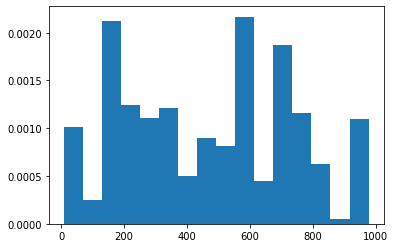

In [28]:
h = np.random.choice(elements, 1000, p=probabilities)
plt.hist(h, 16, density=True)
plt.show()

**Среднее значение**  
Сумма всех элементов на длину всех элементов. Воспользуемся функцией mean().

In [29]:
statistics.mean(h)

474

**Дисперсия** - квадрат стандартного отклонения  
Функция var() вычисляет дисперсию значений элементов массива.

In [35]:
np.var(h)

71123.124284

**Медиана** - это такое значение случайного распределения, что ровно половина выборки меньше него, а ровно половина - больше.

In [32]:
statistics.median(h)

479.0

### **Задание 3**
Пусть брошены 3 уравновешенные монеты. Рассмотрим 3 события:

$A_1$ - монеты 1 и 2 упали одной и той же стороной,

$A_2$ - монеты 2 и 3 упали одной и той же стороной,

$A_3$ - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события являются попарно независимыми, но не являются независимыми в совокупности.

 **Попарно события независимы.** Рассмотрим произвольную пару событий (любую). Аналогично для других пар. Возьмём пару событий $A_1$ и $A_3$. Пусть выполнено одно из них, например $A_3$. Это означает, что монеты 1 и 3 упали одной и той же стороной. Данная информация нам не даёт информации о состоянии монеты 2. Следовательно мы не знаем произошло или нет событие $A_1$. Как результат наступления события $A_3$ не изменяет вероятность наступления события $A_1$. События $A_1$ и $A_3$ попарно независимы, как и любая другая пара событий из этой тройки событий.
    
**Все три  события в совокупности зависимы.** Пусть события $A_1$ и $A_2$ произошли. Согласно событиям $A_1$ и $A_2$ монеты 1, 2, 3 упали одной и той же стороной, то есть и событие $A_3$ выполнено. Также можно рассуждать, взяв за основу то, что события $A_1$ и $A_3$ выполнены, тогда как следствие событие $A_2$ выполнено. Если события $A_2$ и $A_3$ произошли, то и монеты 1 и 2 упали одной стороной (событие $A_1$).

### **Задание 4 (формула полной вероятности)**
В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

Обозначим через $A$ событие, заключающееся в том, что будет куплена продукция высшего сорта, через $B_1$, $B_2$, $B_3$ обозначним события, заключающиеся в покупке продукции, принадлежащей соответственно первому, второму и третьему предприятиям.

Можно применить формулу полной вероятности, причём в наших обозначениях:  
$P(B_1)$ = 0,2 $P(A|B_1)$ = 0,1  
$P(B_2)$ = 0,3 $P(A|B_2)$ = 0,05  
$P(B_3)$ = 0,5 $P(A|B_3)$ = 0,2  

Подставляя эти значения в формулу полной вероятности, получим искомую вероятность:  
$P(A) = P(A|B_1) * P(B_1) + P(A|B_2) * P(B_2) + P(A|B_3) P(B_3)$  
$P(A) = 0,2 * 0,1 + 0,3 * 0,05 + 0,5 * 0,2$  
$P(A) = 0,135$

In [36]:
0.2 * 0.1 + 0.3 * 0.05 + 0.5 * 0.2

0.135